In [1]:
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from glob import glob

In [16]:
def get_file_info(pkl_file):
    """Get the model type and layer from the pickle file name."""
    basename = os.path.basename(pkl_file)
    brain_region, model_info = basename.split('_', 1)
    if 'regression_weights_sae' in pkl_file:
        model_type = 'SAE Features'
    else:
        model_type = 'Reconstruct' if 'SAE' in model_info else 'Base'
    layer = int(model_info.split('L')[-1].replace('.pkl', ''))
    return model_type, layer

def load_results(pickle_dir='pickles/regression_weights', brain_region='broca'):
    """Load all regression result pickles and organize by brain region, model type, and layer."""
    results = {
        'layer': [],
        'r_values': [],
        'model_type': []
    }
    
    # Get all pickle files
    pickle_files = glob(os.path.join(pickle_dir, f'{brain_region}*.pkl'))
    
    for pkl_file in pickle_files:
        # Parse filename to get metadata
        model_type, layer = get_file_info(pkl_file)
        
        # Load pickle
        with open(pkl_file, 'rb') as f:
            data = pickle.load(f)
            
        # Organize results
        if model_type == 'SAE Features':
            print(data['best_alpha'])
        r_values = data['test_r_values']
        results['layer'].extend([layer] * len(r_values))
        results['r_values'].extend(r_values)
        results['model_type'].extend([model_type] * len(r_values))
    
    return results

1000000.0
1000000.0
1000000.0
1000000.0
1000000.0
1000000.0
3162277.6601683795
1000000.0
1000000.0


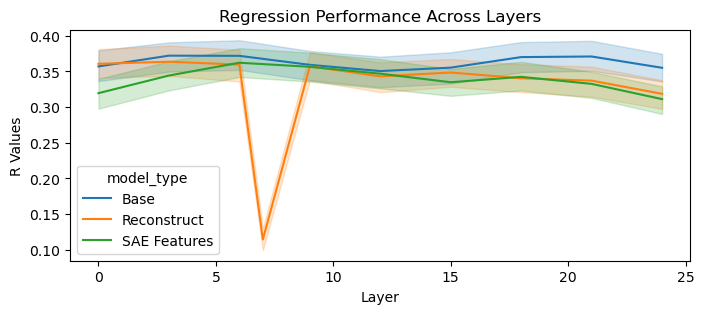

In [17]:
results_A = pd.DataFrame(load_results())
results_B = pd.DataFrame(load_results(pickle_dir='pickles/regression_weights_sae'))
df = pd.concat([results_A, results_B], ignore_index=True)

# Create violin plot
plt.figure(figsize=(8, 3))
sns.lineplot(data=df, x='layer', y='r_values', hue='model_type')

plt.title('Regression Performance Across Layers')
plt.xlabel('Layer')
plt.ylabel('R Values')

plt.show()


3162277.6601683795
3162277.6601683795
1000000.0
3162277.6601683795
3162277.6601683795
3162277.6601683795
3162277.6601683795
3162277.6601683795
3162277.6601683795


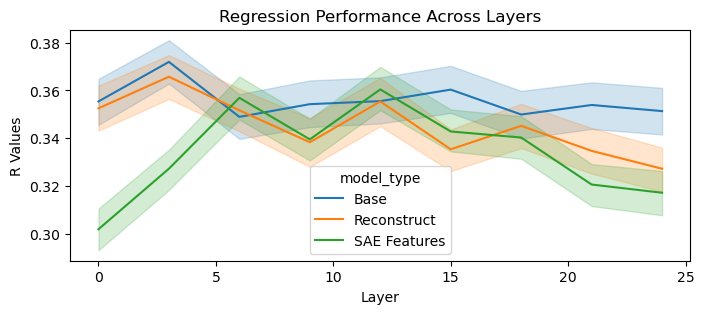

In [18]:
results_A = pd.DataFrame(load_results(brain_region='ac'))
results_B = pd.DataFrame(load_results(pickle_dir='pickles/regression_weights_sae', brain_region='ac'))
df = pd.concat([results_A, results_B], ignore_index=True)

# Create violin plot
plt.figure(figsize=(8, 3))
sns.lineplot(data=df, x='layer', y='r_values', hue='model_type')

plt.title('Regression Performance Across Layers')
plt.xlabel('Layer')
plt.ylabel('R Values')

plt.show()
